In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Folk1a = pd.read_csv("./FOLK1A.csv", delimiter=";")
Folk1a


,OMRÅDE,CIVILSTAND,TID,INDHOLD
0,Hele landet,I alt,2008K1,5475791
1,Hele landet,I alt,2008K2,5482266
2,Hele landet,I alt,2008K3,5489022
3,Hele landet,I alt,2008K4,5505995
4,Hele landet,I alt,2009K1,5511451
...,...,...,...,...
30970,Aalborg,Fraskilt,2021K3,18199
30971,Aalborg,Fraskilt,2021K4,18208
30972,Aalborg,Fraskilt,2022K1,18295
30973,Aalborg,Fraskilt,2022K2,18372


C:\Users\leoni\AppData\Local\Temp\ipykernel_155924\1384171046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  befolkning_dk_Fraskilt["PCT_SINCE_2008k1"] = (befolkning_dk_Fraskilt["INDHOLD"] / int(k1_2008["INDHOLD"]) -1) * 100


<AxesSubplot:xlabel='TID'>

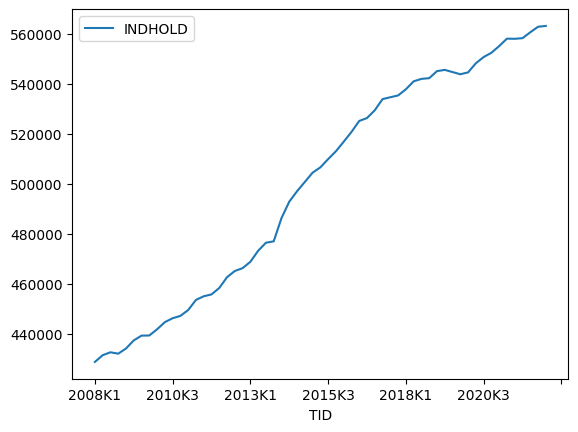

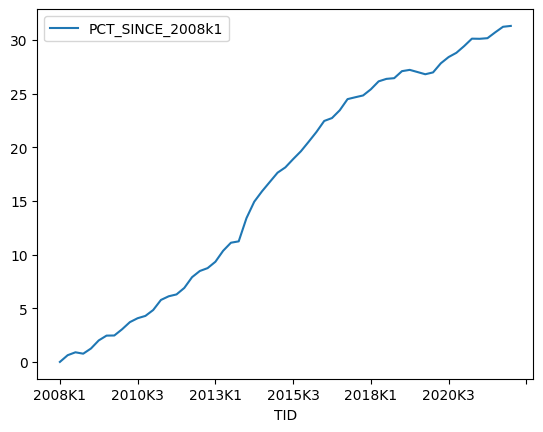

In [2]:
befolkning_dk = Folk1a[Folk1a["OMRÅDE"] == "Hele landet"]
befolkning_dk_Fraskilt = befolkning_dk[befolkning_dk["CIVILSTAND"] == "Fraskilt"]

befolkning_dk_Fraskilt.plot(kind="line", x="TID")

#k1_2020 = befolkning_dk_Fraskilt[befolkning_dk_Fraskilt["TID"] == "2020K1"]
k1_2008 = befolkning_dk_Fraskilt[befolkning_dk_Fraskilt["TID"] == "2008K1"]

befolkning_dk_Fraskilt["PCT_SINCE_2008k1"] = (befolkning_dk_Fraskilt["INDHOLD"] / int(k1_2008["INDHOLD"]) -1) * 100

befolkning_dk_Fraskilt.plot(kind="line", x="TID", y="PCT_SINCE_2008k1")

# (int(k1_2020["INDHOLD"]) / int(k1_2008["INDHOLD"]) -1) * 100


#print(((k1_2020["INDHOLD"] / k1_2008["INDHOLD"]) -1) * 100)

<function matplotlib.pyplot.show(close=None, block=None)>

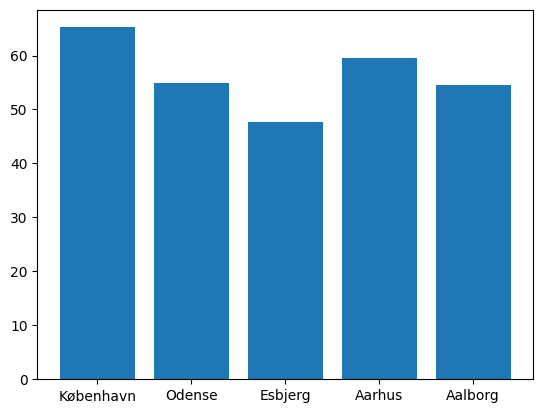

In [129]:
befolkning_dk_2020 = Folk1a[(Folk1a["OMRÅDE"].isin(["København","Aarhus","Aalborg","Odense","Esbjerg"])) & (Folk1a["TID"] == "2020K1")]
befolkning_dk_TOT = befolkning_dk_2020[befolkning_dk_2020["CIVILSTAND"] == "I alt"]
befolkning_dk_UGIFT = befolkning_dk_2020[befolkning_dk_2020["CIVILSTAND"] == "Ugift"]

dict = {}
for i in befolkning_dk_TOT["OMRÅDE"]:
    UGIFT = befolkning_dk_UGIFT[(befolkning_dk_UGIFT["OMRÅDE"] == i)].iat[0,-1]
    TOT = befolkning_dk_TOT[(befolkning_dk_TOT["OMRÅDE"] == i)].iat[0,-1]
    dict[i] = (UGIFT / TOT) * 100

plt.bar(dict.keys(),dict.values())
plt.show